In [11]:
import numpy as np
import pandas as pd
from pandas import read_csv
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('C:\\Users\\Syed Hasnat\\OneDrive\\Journal Paper\\Code\\Hasant code\\dataset_plots_code\\Dataset\\7_Dataset.csv',parse_dates=['date_and_hour'],index_col=['date_and_hour'])
df.head(2)

,System_load,Year,Month_of_year,Day_Of_Week,hour_of_day,holiday,winter_peak,Spring_Peak,Summer_Peak,Autumn_peak
date_and_hour,,,,,,,,,,
2015-01-01 00:00:00,8288.0,2015,1,3,0,0,0,0,0,0
2015-01-01 01:00:00,8099.0,2015,1,3,1,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46728 entries, 2015-01-01 00:00:00 to 2020-04-30 23:00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   System_load    46728 non-null  float64
 1   Year           46728 non-null  int64  
 2   Month_of_year  46728 non-null  int64  
 3   Day_Of_Week    46728 non-null  int64  
 4   hour_of_day    46728 non-null  int64  
 5   holiday        46728 non-null  int64  
 6   winter_peak    46728 non-null  int64  
 7   Spring_Peak    46728 non-null  int64  
 8   Summer_Peak    46728 non-null  int64  
 9   Autumn_peak    46728 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.9 MB


In [4]:
dataset = df.iloc[:].values #np.array(df) dwara use koli sho
dataset.shape

(46728, 10)

In [5]:
#del df['Year']

In [5]:
dataset = df.iloc[:].values #np.array(df) dwara use koli sho
dataset.shape

(46728, 10)

# Function to split data For Training, Validation & Test

In [6]:
def t_v_t(dataset,train_p,validation_p,test_p):
    '''
    \n\nt_v_t(dataset,train_p,validation_p,test_p)\n
    dataset = DataFrame
    train_p = Percentage of Traing Data
    validation_p = Percentage of Validation Data
    test_p = Percentage of Test Data
    \n\nExample:
    to call this Function;
    train_set , validation_set , test_set = t_v_t(df,70,20,10)
    '''
    train_p=train_p/100
    validation_p=validation_p/100
    test_p=test_p/100
    train=int(np.round(len(dataset)*train_p))                                 #70
    validation=int(np.round(len(dataset)*validation_p))                       #20
    test=int(np.round(len(dataset)*test_p))                                   #10
    train_set,validation_set,test_set=dataset[:train],dataset[train:train+validation],dataset[train+validation:len(dataset)]
    return train_set,validation_set,test_set

In [7]:
print(t_v_t.__doc__)


    

t_v_t(dataset,train_p,validation_p,test_p)

    dataset = DataFrame
    train_p = Percentage of Traing Data
    validation_p = Percentage of Validation Data
    test_p = Percentage of Test Data
    

Example:
    to call this Function;
    train_set , validation_set , test_set = t_v_t(df,70,20,10)
    


# Normalization

In [8]:
train_set , validation_set , test_set = t_v_t(df,70,20,10);

In [9]:
print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

(32710, 10)
(9346, 10)
(4672, 10)


##### MinMax

In [11]:
train_set_load             = train_set['System_load'].values.reshape(-1, 1)              
validation_set_load        = validation_set['System_load'].values.reshape(-1, 1)
test_set_load              = test_set['System_load'].values.reshape(-1, 1)
#.........................................................................
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_set_load)
#.........................................................................
scaled_train_set_load      = scaler.transform(train_set_load)
scaled_validation_set_load = scaler.transform(validation_set_load)
scaled_test_set_load       = scaler.transform(test_set_load)

In [13]:
pickle.dump(scaler, open ("C:\\Users\\arif\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\scaler.pkl",'wb') )

##### StandardScaler

In [12]:
train_set_load             = train_set['System_load'].values.reshape(-1, 1)              
validation_set_load        = validation_set['System_load'].values.reshape(-1, 1)
test_set_load              = test_set['System_load'].values.reshape(-1, 1)
#.........................................................................
scaler = StandardScaler()
scaler.fit(train_set_load)
#.........................................................................
scaled_train_set_load      = scaler.transform(train_set_load)
scaled_validation_set_load = scaler.transform(validation_set_load)
scaled_test_set_load       = scaler.transform(test_set_load)

In [13]:
pickle.dump(scaler, open ("C:\\Users\\Syed Hasnat\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\Standardscaler.pkl",'wb') )

In [14]:
train_setO     = train_set[:].values

year           = train_setO[:,1:2]
holiday        = train_setO[:,5:6]
winter_peak    = train_setO[:,6:7]
Spring_Peak    = train_setO[:,7:8]
Summer_Peak    = train_setO[:,8:9]
Autumn_peak    = train_setO[:,9:10]

en_year        = OneHotEncoder(categories=[[2015,2016,2017,2018,2019,2020]],handle_unknown='ignore')
en_holiday     = OneHotEncoder(handle_unknown='ignore')
en_week        = OneHotEncoder(handle_unknown='ignore')
en_spring      = OneHotEncoder(handle_unknown='ignore')
en_summer      = OneHotEncoder(handle_unknown='ignore')
en_autumn      = OneHotEncoder(handle_unknown='ignore')

yearf          = en_year.fit(year)
holidayf       = en_holiday.fit(holiday)
winter_peakf   = en_week.fit(winter_peak)
Spring_Peakf   = en_spring.fit(Spring_Peak)
Summer_Peakf   = en_summer.fit(Summer_Peak)
Autumn_peakf   = en_autumn.fit(Autumn_peak)

yeart          = yearf.transform(year).toarray()
holidayt       = holidayf.transform(holiday).toarray()
winter_peakt   = winter_peakf.transform(winter_peak).toarray()
Spring_Peakt   = Spring_Peakf.transform(Spring_Peak).toarray()
Summer_Peakt   = Summer_Peakf.transform(Summer_Peak).toarray()
Autumn_peakt   = Autumn_peakf.transform(Autumn_peak).toarray()

#train_setO here O is for onehot
train_setO     = np.concatenate((yeart , holidayt, winter_peakt, Spring_Peakt, Summer_Peakt,Autumn_peakt),axis=1) 
train_setO.shape

(32710, 16)

In [15]:
validation_setO = validation_set[:].values

year_v            = validation_setO[:,1:2]
holiday_v         = validation_setO[:,5:6]
winter_peak_v     = validation_setO[:,6:7]
Spring_Peak_v     = validation_setO[:,7:8]
Summer_Peak_v     = validation_setO[:,8:9]
Autumn_peak_v     = validation_setO[:,9:10]

year_vt           = yearf.transform(year_v).toarray()
holiday_vt        = holidayf.transform(holiday_v).toarray()
winter_peak_vt    = winter_peakf.transform(winter_peak_v).toarray()
Spring_Peak_vt    = Spring_Peakf.transform(Spring_Peak_v).toarray()
Summer_Peak_vt    = Summer_Peakf.transform(Summer_Peak_v).toarray()
Autumn_peak_vt    = Autumn_peakf.transform(Autumn_peak_v).toarray()

val_one_hot = np.concatenate((year_vt,holiday_vt, winter_peak_vt, Spring_Peak_vt, Summer_Peak_vt, Autumn_peak_vt),axis=1) 
val_one_hot.shape

(9346, 16)

In [16]:
test_setO      = test_set[:].values

year_test           = test_setO[:,1:2]
holiday_test        = test_setO[:,5:6]
winter_peak_test    = test_setO[:,6:7]
Spring_Peak_test    = test_setO[:,7:8]
Summer_Peak_test    = test_setO[:,8:9]
Autumn_peak_test    = test_setO[:,9:10]

year_tt          = en_year.transform(year_test).toarray()
holiday_tt       = en_holiday.transform(holiday_test).toarray()
winter_peak_tt   = en_week.transform(winter_peak_test).toarray()
Spring_Peak_tt   = en_spring.transform(Spring_Peak_test).toarray()
Summer_Peak_tt   = en_summer.transform(Summer_Peak_test).toarray()
Autumn_peak_tt   = en_autumn.transform(Autumn_peak_test).toarray()

test_one_hot = np.concatenate((year_tt,holiday_tt, winter_peak_tt, Spring_Peak_tt, Summer_Peak_tt, Autumn_peak_tt),axis=1) 
test_one_hot.shape 

(4672, 16)

In [17]:
cyclic_train = train_set[['Month_of_year','Day_Of_Week','hour_of_day']]
cyclic_train = cyclic_train[:].values

sin_montht   = np.sin(2*np.pi*cyclic_train[:,0:1]/12)
cos_montht   = np.cos(2*np.pi*cyclic_train[:,0:1]/12)

sin_weekt    = np.sin(2*np.pi*cyclic_train[:,1:2]/6)
cos_weekt    = np.cos(2*np.pi*cyclic_train[:,1:2]/6)
  
sin_hourt    = np.sin(2*np.pi*cyclic_train[:,2:3]/24)
cos_hourt    = np.cos(2*np.pi*cyclic_train[:,2:3]/24)

cyclic_train = np.concatenate((sin_montht, cos_montht, sin_weekt, cos_weekt, sin_hourt,cos_hourt), axis=1) 

In [18]:
cyclic_validation = validation_set[['Month_of_year','Day_Of_Week','hour_of_day']]
cyclic_validation = cyclic_validation[:].values

sin_montht        = np.sin(2*np.pi*cyclic_validation[:,0:1]/12)
cos_montht        = np.cos(2*np.pi*cyclic_validation[:,0:1]/12)

sin_weekt         = np.sin(2*np.pi*cyclic_validation[:,1:2]/6)
cos_weekt         = np.cos(2*np.pi*cyclic_validation[:,1:2]/6)

sin_hourt         = np.sin(2*np.pi*cyclic_validation[:,2:3]/24)
cos_hourt         = np.cos(2*np.pi*cyclic_validation[:,2:3]/24)

cyclic_validation = np.concatenate((sin_montht, cos_montht, sin_weekt, cos_weekt, sin_hourt,cos_hourt), axis=1) 

In [19]:
cyclic_test = test_set[['Month_of_year','Day_Of_Week','hour_of_day']]
cyclic_test = cyclic_test[:].values

sin_montht  = np.sin(2*np.pi*cyclic_test[:,0:1]/12)
cos_montht  = np.cos(2*np.pi*cyclic_test[:,0:1]/12)

sin_weekt   = np.sin(2*np.pi*cyclic_test[:,1:2]/6)
cos_weekt   = np.cos(2*np.pi*cyclic_test[:,1:2]/6)

sin_hourt   = np.sin(2*np.pi*cyclic_test[:,2:3]/24)
cos_hourt   = np.cos(2*np.pi*cyclic_test[:,2:3]/24)

cyclic_test = np.concatenate((sin_montht, cos_montht, sin_weekt, cos_weekt, sin_hourt,cos_hourt), axis=1) 

In [20]:
train = np.concatenate((scaled_train_set_load, train_setO, cyclic_train), axis=1)

In [21]:
validation = np.concatenate((scaled_validation_set_load, val_one_hot, cyclic_validation), axis=1)

In [22]:
test = np.concatenate((scaled_test_set_load, test_one_hot, cyclic_test), axis=1)

In [23]:
train_df = pd.DataFrame(data=train.transpose(), index=['System_load', 'Year1','Year2','Year3','Year4','Year5','Year6',
                                            'Month_of_year1','Month_of_year2','Day_Of_Week1','Day_Of_Week2',
                                            'hour_of_day1', 'hour_of_day2','holiday1','holiday2', 'winter_peak1',
                                            'winter_peak2','Spring_Peak1','Spring_Peak','Summer_Peak1','Summer_Peak2',
                                            'Autumn_peak1','Autumn_peak']).transpose()

In [24]:
train_df.to_csv('C:\\Users\\Syed Hasnat\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\8_train_stabdardScaler.csv', index=True)

In [25]:
validation_df = pd.DataFrame(data=validation.transpose(), index=['System_load', 'Year1','Year2','Year3','Year4','Year5','Year6',
                                            'Month_of_year1','Month_of_year2','Day_Of_Week1','Day_Of_Week2',
                                            'hour_of_day1', 'hour_of_day2','holiday1','holiday2', 'winter_peak1',
                                            'winter_peak2','Spring_Peak1','Spring_Peak','Summer_Peak1','Summer_Peak2',
                                            'Autumn_peak1','Autumn_peak']).transpose()

In [26]:
validation_df.to_csv('C:\\Users\\Syed Hasnat\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\8_validation_stabdardScaler.csv', index=True)

In [27]:
test_df = pd.DataFrame(data=test.transpose(), index=['System_load', 'Year1','Year2','Year3','Year4','Year5','Year6',
                                            'Month_of_year1','Month_of_year2','Day_Of_Week1','Day_Of_Week2',
                                            'hour_of_day1', 'hour_of_day2','holiday1','holiday2', 'winter_peak1',
                                            'winter_peak2','Spring_Peak1','Spring_Peak','Summer_Peak1','Summer_Peak2',
                                            'Autumn_peak1','Autumn_peak']).transpose()

In [28]:
test_df.to_csv('C:\\Users\\Syed Hasnat\\OneDrive\\Journal Paper\\Code\\Irshad\\Dataset\\8_test_stabdardScaler.csv', index=True)

In [37]:
validation_df

,System_load,Year1,Year2,Year3,Year4,Year5,Year6,Month_of_year1,Month_of_year2,Day_Of_Week1,...,holiday1,holiday2,winter_peak1,winter_peak2,Spring_Peak1,Spring_Peak,Summer_Peak1,Summer_Peak2,Autumn_peak1,Autumn_peak
0,0.707816,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-1.000000,-1.836970e-16,0.000000,1.0,-0.500000,8.660254e-01
1,0.692655,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-1.000000,-1.836970e-16,0.000000,1.0,-0.258819,9.659258e-01
2,0.583457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-1.000000,-1.836970e-16,0.866025,0.5,0.000000,1.000000e+00
3,0.614739,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-1.000000,-1.836970e-16,0.866025,0.5,0.258819,9.659258e-01
4,0.591805,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-1.000000,-1.836970e-16,0.866025,0.5,0.500000,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,0.420429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,-0.866025,5.000000e-01,-0.866025,0.5,0.707107,7.071068e-01
9342,0.407571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,-0.866025,5.000000e-01,-0.866025,0.5,0.866025,5.000000e-01
9343,0.398599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,-0.866025,5.000000e-01,-0.866025,0.5,0.965926,2.588190e-01
9344,0.433335,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,-0.866025,5.000000e-01,-0.866025,0.5,1.000000,6.123234e-17


In [41]:
train[:,[0, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]

array([[ 0.31857218,  1.        ,  0.        , ..., -1.        ,
         0.        ,  1.        ],
       [ 0.30950439,  1.        ,  0.        , ..., -1.        ,
         0.25881905,  0.96592583],
       [ 0.30446673,  1.        ,  0.        , ..., -1.        ,
         0.5       ,  0.8660254 ],
       ...,
       [ 0.72259272,  1.        ,  0.        , ...,  1.        ,
        -0.96592583,  0.25881905],
       [ 0.70613635,  1.        ,  0.        , ...,  1.        ,
        -0.8660254 ,  0.5       ],
       [ 0.69649283,  1.        ,  0.        , ...,  1.        ,
        -0.70710678,  0.70710678]])

In [21]:
train.shape

(32710, 23)

In [112]:
cyclic_validation.shape

(9346, 6)

In [110]:
cyclic_train.shape

(32710, 6)

In [71]:
cyclic_train = train_set[['Month_of_year','Day_Of_Week','hour_of_day']]
cyclic_train = cyclic_train[:].values

In [72]:
cyclic_train

array([[ 1,  3,  0],
       [ 1,  3,  1],
       [ 1,  3,  2],
       ...,
       [ 9,  0, 19],
       [ 9,  0, 20],
       [ 9,  0, 21]], dtype=int64)

In [73]:
train_set

,System_load,Year,Month_of_year,Day_Of_Week,hour_of_day,holiday,winter_peak,Spring_Peak,Summer_Peak,Autumn_peak
date_and_hour,,,,,,,,,,
2015-01-01 00:00:00,8288.0,2015,1,3,0,0,0,0,0,0
2015-01-01 01:00:00,8099.0,2015,1,3,1,0,0,0,0,0
2015-01-01 02:00:00,7994.0,2015,1,3,2,0,0,0,0,0
2015-01-01 03:00:00,7965.0,2015,1,3,3,0,0,0,0,0
2015-01-01 04:00:00,8120.0,2015,1,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-09-24 17:00:00,15502.0,2018,9,0,17,0,0,0,0,0
2018-09-24 18:00:00,16805.0,2018,9,0,18,0,0,0,0,1
2018-09-24 19:00:00,16709.0,2018,9,0,19,0,0,0,0,1


In [74]:
 train_set[:].values

array([[8.2880e+03, 2.0150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0990e+03, 2.0150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.9940e+03, 2.0150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.6709e+04, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6366e+04, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6165e+04, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [75]:
np.sin(2*np.pi*cyclic_train[:,0:1]/12)

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       ...,
       [-1. ],
       [-1. ],
       [-1. ]])

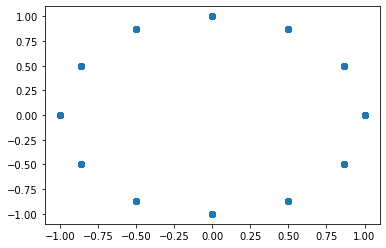

In [85]:
import matplotlib.pyplot as plt
plt.scatter(np.cos(2*np.pi*cyclic_train[:,0:1]/12), np.sin(2*np.pi*cyclic_train[:,0:1]/12))

In [77]:
np.sin(2*np.pi*cyclic_train[:,0:1]/12).plot.scatter('sin_time','cos_time').set_aspect('equal')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [92]:
from sklearn.preprocessing import FunctionTransformer
def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [104]:
cyclic_train = train_set[['Month_of_year']]

In [106]:
X_2 = cyclic_train.copy()

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["Month_of_year"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["Month_of_year"]

In [107]:
X_2

,Month_of_year,month_sin,month_cos
date_and_hour,,,
2015-01-01 00:00:00,1,0.5,8.660254e-01
2015-01-01 01:00:00,1,0.5,8.660254e-01
2015-01-01 02:00:00,1,0.5,8.660254e-01
2015-01-01 03:00:00,1,0.5,8.660254e-01
2015-01-01 04:00:00,1,0.5,8.660254e-01
...,...,...,...
2018-09-24 17:00:00,9,-1.0,-1.836970e-16
2018-09-24 18:00:00,9,-1.0,-1.836970e-16
2018-09-24 19:00:00,9,-1.0,-1.836970e-16


In [31]:
train_set

,System_load,Year,Month_of_year,Day_Of_Week,hour_of_day,holiday,winter_peak,Spring_Peak,Summer_Peak,Autumn_peak
date_and_hour,,,,,,,,,,
2015-01-01 00:00:00,8288.0,2015,1,3,0,0,0,0,0,0
2015-01-01 01:00:00,8099.0,2015,1,3,1,0,0,0,0,0
2015-01-01 02:00:00,7994.0,2015,1,3,2,0,0,0,0,0
2015-01-01 03:00:00,7965.0,2015,1,3,3,0,0,0,0,0
2015-01-01 04:00:00,8120.0,2015,1,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-09-24 17:00:00,15502.0,2018,9,0,17,0,0,0,0,0
2018-09-24 18:00:00,16805.0,2018,9,0,18,0,0,0,0,1
2018-09-24 19:00:00,16709.0,2018,9,0,19,0,0,0,0,1


In [32]:
train_set[:].values

array([[8.2880e+03, 2.0150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0990e+03, 2.0150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.9940e+03, 2.0150e+03, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.6709e+04, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6366e+04, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6165e+04, 2.0180e+03, 9.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [33]:
train_setO     = train_set[:].values

year           = train_setO[:,1:2]
en_year        = OneHotEncoder(categories=[[2015,2016,2017,2018,2019,2020]],handle_unknown='ignore')

In [39]:
yeart          = en_year.fit(year)
yeart          = en_year.transform(year).toarray()

In [40]:
yeart

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [41]:
test_setO      = test_set[:].values

In [42]:
year           = test_setO[:,1:2]

In [43]:
yeart          = en_year.transform(year).toarray()

In [44]:
yeart

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [56]:
train_set

,System_load,Year,Month_of_year,Day_Of_Week,hour_of_day,holiday,winter_peak,Spring_Peak,Summer_Peak,Autumn_peak
date_and_hour,,,,,,,,,,
2015-01-01 00:00:00,8288.0,2015,1,3,0,0,0,0,0,0
2015-01-01 01:00:00,8099.0,2015,1,3,1,0,0,0,0,0
2015-01-01 02:00:00,7994.0,2015,1,3,2,0,0,0,0,0
2015-01-01 03:00:00,7965.0,2015,1,3,3,0,0,0,0,0
2015-01-01 04:00:00,8120.0,2015,1,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-09-24 17:00:00,15502.0,2018,9,0,17,0,0,0,0,0
2018-09-24 18:00:00,16805.0,2018,9,0,18,0,0,0,0,1
2018-09-24 19:00:00,16709.0,2018,9,0,19,0,0,0,0,1


In [59]:
#nominals 
#en_ for encoding

train_setO     = train_set[:].values

year           = train_setO[:,1:2]
holiday        = train_setO[:,5:6]
winter_peak    = train_setO[:,6:7]
Spring_Peak    = train_setO[:,7:8]
Summer_Peak    = train_setO[:,8:9]
Autumn_peak    = train_setO[:,9:10]

In [60]:
en_year        = OneHotEncoder(categories=[[2015,2016,2017,2018,2019,2020]],handle_unknown='ignore')
en_holiday     = OneHotEncoder(handle_unknown='ignore')
en_week        = OneHotEncoder(handle_unknown='ignore')
en_spring      = OneHotEncoder(handle_unknown='ignore')
en_summer      = OneHotEncoder(handle_unknown='ignore')
en_autumn      = OneHotEncoder(handle_unknown='ignore')

In [61]:
yearf          = en_year.fit(year)
holidayf       = en_holiday.fit(holiday)
winter_peakf   = en_week.fit(winter_peak)
Spring_Peakf   = en_spring.fit(Spring_Peak)
Summer_Peakf   = en_summer.fit(Summer_Peak)
Autumn_peakf   = en_autumn.fit(Autumn_peak)


In [63]:
yeart          = yearf.transform(year).toarray()
holidayt       = holidayf.transform(holiday).toarray()
winter_peakt   = winter_peakf.transform(winter_peak).toarray()
Spring_Peakt   = Spring_Peakf.transform(Spring_Peak).toarray()
Summer_Peakt   = Summer_Peakf.transform(Summer_Peak).toarray()
Autumn_peakt   = Autumn_peakf.transform(Autumn_peak).toarray()

In [10]:
train_set['System_load'].values.reshape(-1, 1)

array([[ 8288.],
       [ 8099.],
       [ 7994.],
       ...,
       [16709.],
       [16366.],
       [16165.]])

In [11]:
train_set['System_load'].values.reshape(-1, 1)

array([[ 8288.],
       [ 8099.],
       [ 7994.],
       ...,
       [16709.],
       [16366.],
       [16165.]])

In [14]:
validation_set['System_load'].values.reshape(-1, 1)

array([[16401.],
       [16085.],
       [13809.],
       ...,
       [ 9956.],
       [10680.],
       [10522.]])

In [15]:
test_set['System_load'].values.reshape(-1, 1)

array([[11099.],
       [12240.],
       [12606.],
       ...,
       [16824.],
       [16332.],
       [15003.]])

In [16]:
train_set_load = train_set['System_load'].values.reshape(-1, 1)              
validation_set_load = validation_set['System_load'].values.reshape(-1, 1)
test_set_load = test_set['System_load'].values.reshape(-1, 1)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_set_load)
scaled_train_set_load = scaler.transform(train_set_load) 

In [18]:
scaled_train_set_load

array([[0.31857218],
       [0.30950439],
       [0.30446673],
       ...,
       [0.72259272],
       [0.70613635],
       [0.69649283]])

In [22]:
print('minimum:', train_set.min()['System_load'])
print('maximum:', train_set.max()['System_load'])
print('maximum:', train_set['System_load'][0])
print('Normalized:', (8288.0-1648.0)/(22491.0-1648.0))

minimum: 1648.0
maximum: 22491.0
maximum: 8288.0
Normalized: 0.3185721825073166


In [20]:
scaled_validation_set_load = scaler.transform(validation_set_load) 

In [23]:
scaled_validation_set_load

array([[0.70781557],
       [0.69265461],
       [0.58345728],
       ...,
       [0.39859905],
       [0.43333493],
       [0.42575445]])

In [25]:
print('minimum:', validation_set.min()['System_load'])
print('maximum:', validation_set.max()['System_load'])
print('maximum:', validation_set['System_load'][0])
print('Normalized by train parameters:', (16401.0-1648.0)/(22491.0-1648.0))
print('Normalized by validation parameters:', (16401.0-5985.0)/(22696.0-5985.0))

minimum: 5985.0
maximum: 22696.0
maximum: 16401.0
Normalized by train parameters: 0.7078155735738617
Normalized by validation parameters: 0.6233020166357489


In [ ]:
xtestnorm = normalizer.transform(Xtest) 

In [ ]:
##################################################################################
# train_set['System_load'].values da mong la row rake
# train_set['System_load'].values.reshape(-1, 1) da mong la column rakae
##################################################################################

scaled_train_set_load = scaler.fit_transform(train_set_load)
scaled_validation_set_load = scaler.fit_transform(validation_set_load)
scaled_test_set_load = scaler.fit_transform(test_set_load)
##################################################################################
scaled_load=np.concatenate((scaled_train_set_load,scaled_validation_set_load
                            ,scaled_test_set_load), axis=0) #satckeed vertically

In [67]:
scaled_load.shape

(46728, 1)

# OneHot Wncoding

In [10]:
train_set

,System_load,Year,Month_of_year,Day_Of_Week,hour_of_day,holiday,winter_peak,Spring_Peak,Summer_Peak,Autumn_peak
date_and_hour,,,,,,,,,,
2015-01-01 00:00:00,8288.0,2015,1,3,0,0,0,0,0,0
2015-01-01 01:00:00,8099.0,2015,1,3,1,0,0,0,0,0
2015-01-01 02:00:00,7994.0,2015,1,3,2,0,0,0,0,0
2015-01-01 03:00:00,7965.0,2015,1,3,3,0,0,0,0,0
2015-01-01 04:00:00,8120.0,2015,1,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-09-24 17:00:00,15502.0,2018,9,0,17,0,0,0,0,0
2018-09-24 18:00:00,16805.0,2018,9,0,18,0,0,0,0,1
2018-09-24 19:00:00,16709.0,2018,9,0,19,0,0,0,0,1


In [13]:
train_setO     = train_set[:].values

#nominals
year           = train_setO[:,1:2]

In [41]:
year[0][0].dtype

dtype('float64')

In [44]:
ency            = OneHotEncoder(categories = [2015., 2016., 2017., 2018.], handle_unknown='ignore')

In [45]:
ency.fit(year)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [48]:
ency.transform(year).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [54]:
validation_setO = validation_set[:].values

#nominals
year        = validation_setO[:,1:2]

In [55]:
ency.transform(year).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [56]:
test_setO = test_set[:].values
year      = test_setO[:,1:2]

In [57]:
ency.transform(year).toarray()

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
train_setO     = train_set[:].values

#nominals
year           = train_setO[:,1:2]
holiday        = train_setO[:,5:6]
winter_peak    = train_setO[:,6:7]
Spring_Peak    = train_setO[:,7:8]
Summer_Peak    = train_setO[:,8:9]
Autumn_peak    = train_setO[:,9:10]


ency            = OneHotEncoder(handle_unknown='ignore')
ench            = OneHotEncoder(handle_unknown='ignore')
encw            = OneHotEncoder(handle_unknown='ignore')
encsp           = OneHotEncoder(handle_unknown='ignore')
encsu           = OneHotEncoder(handle_unknown='ignore')
enca            = OneHotEncoder(handle_unknown='ignore')

ency.fit(year.reshape(-1,1))
yeart       = ency.transform(holiday.reshape(-1, 1)).toarray()

ench.fit(holiday.reshape(-1,1))
holidayt       = ench.transform(holiday.reshape(-1, 1)).toarray()

encw.fit(winter_peak.reshape(-1,1))
winter_peakt   = encw.transform(winter_peak.reshape(-1, 1)).toarray()

encsp.fit(Spring_Peak.reshape(-1,1))
Spring_Peakt   = encsp.transform(Spring_Peak.reshape(-1, 1)).toarray()

encsu.fit(Summer_Peak.reshape(-1,1))
Summer_Peakt   = encsu.transform(Summer_Peak.reshape(-1, 1)).toarray()

enca.fit(Autumn_peak.reshape(-1,1))
Autumn_peakt   = enca.transform(Autumn_peak.reshape(-1, 1)).toarray()

In [ ]:
test_setO = test_set[:].values


In [52]:
df.head(2)

,System_load,Year,Month_of_year,Day_Of_Week,hour_of_day,holiday,winter_peak,Spring_Peak,Summer_Peak,Autumn_peak
date_and_hour,,,,,,,,,,
2015-01-01 00:00:00,8288.0,2015,1,3,0,0,0,0,0,0
2015-01-01 01:00:00,8099.0,2015,1,3,1,0,0,0,0,0


In [55]:
a = df.columns

In [ ]:
Year          = np.array(df[a[1]].values).reshape(-1,1)
Month_of_year = np.array(df[a[2]].values).reshape(-1,1)
Day_Of_Week   = np.array(df[a[3]].values).reshape(-1,1)
hour_of_day   = np.array(df[a[4]].values).reshape(-1,1)
holiday       = np.array(df[a[5]].values).reshape(-1,1)
winter_peak   = np.array(df[a[6]].values).reshape(-1,1)
Spring_Peak   = np.array(df[a[7]].values).reshape(-1,1)
Summer_Peak   = np.array(df[a[8]].values).reshape(-1,1)
Autumn_peak   = np.array(df[a[9]].values).reshape(-1,1)

enc           = OneHotEncoder(handle_unknown='ignore')

enc.fit(Year)
Yeart         = enc.transform(Year).toarray()

enc.fit(Month_of_year)
Month_of_yeart= enc.transform(Month_of_year).toarray()

enc.fit(Day_Of_Week)
Day_Of_Weekt  = enc.transform(Day_Of_Week).toarray()

enc.fit(hour_of_day)
hour_of_dayt  = enc.transform(hour_of_day).toarray()

enc.fit(holiday)
holidayt      = enc.transform(holiday).toarray()

enc.fit(winter_peak)
winter_peakt  = enc.transform(winter_peak).toarray()

enc.fit(Spring_Peak)
Spring_Peakt  = enc.transform(Spring_Peak).toarray()

enc.fit(Summer_Peak)
Summer_Peakt  = enc.transform(Summer_Peak).toarray()

enc.fit(Autumn_peak)
Autumn_peakt  = enc.transform(Autumn_peak).toarray()



In [ ]:
dataset = np.concatenate((scaled_load, Yeart, Month_of_yeart, 
                          Day_Of_Weekt, hour_of_dayt,holidayt, 
                          winter_peakt, Spring_Peakt, Summer_Peakt, 
                          Autumn_peakt),axis=1) #horizntl stacked
dataset.shape

In [ ]:
1 +6 +12 +7 +24 +2          +2+2+2+2

# practice

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [106]:
# One-hot encoding a single column
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

df = load_dataset('penguins')
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['island']])
print(transformed.toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [110]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(test_set[['Year']])
print(transformed.toarray())

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [13]:
train_set , validation_set , test_set = t_v_t(df,70,20,10);

In [12]:
Year          = np.array(df[a[1]].values).reshape(-1,1)
Month_of_year = np.array(df[a[2]].values).reshape(-1,1)
Day_Of_Week   = np.array(df[a[3]].values).reshape(-1,1)
hour_of_day   = np.array(df[a[4]].values).reshape(-1,1)
holiday       = np.array(df[a[5]].values).reshape(-1,1)
winter_peak   = np.array(df[a[6]].values).reshape(-1,1)
Spring_Peak   = np.array(df[a[7]].values).reshape(-1,1)
Summer_Peak   = np.array(df[a[8]].values).reshape(-1,1)
Autumn_peak   = np.array(df[a[9]].values).reshape(-1,1)

NameError: name 'a' is not defined

In [16]:
y = validation_set['Year'].values.reshape(-1,1)

In [17]:
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(y)
print(result)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [18]:
y

array([[2018],
       [2018],
       [2018],
       ...,
       [2019],
       [2019],
       [2019]], dtype=int64)

In [100]:
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(y)
ye         = enc.transform(y).toarray()

In [101]:
ye

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [104]:
yt = validation_set['Year'].values.reshape(-1,1)

In [105]:
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(yt)
yet         = enc.transform(y).toarray()
yet

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [111]:
print(ohe.categories_)

[array([2019, 2020], dtype=int64)]


In [75]:
X = [['Male', 1], ['Female', 3], ['Female', 2]]
X

[['Male', 1], ['Female', 3], ['Female', 2]]

In [76]:
type(X)

list

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

In [5]:
yt = df['Year'].values.reshape(-1,1)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
#from sklego.preprocessing import RepeatingBasisFunction

# settings
plt.style.use("seaborn")
sns.set_palette("colorblind")

%matplotlib inline

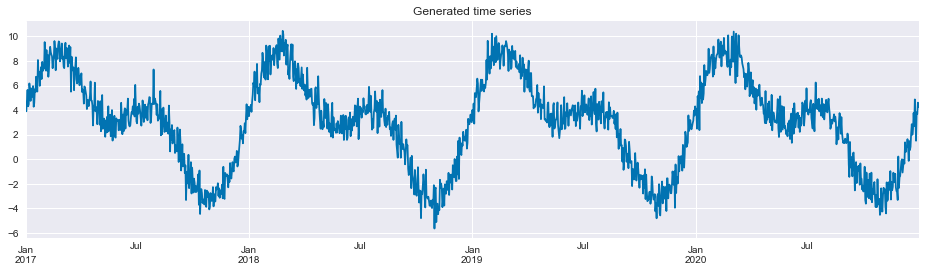

In [3]:
# for reproducibility
np.random.seed(42)

# generate the DataFrame with dates
range_of_dates = pd.date_range(start="2017-01-01", 
                               end="2020-12-30")
X = pd.DataFrame(index=range_of_dates)

# create a sequence of day numbers
X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

# generate the components of the target
signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

# combine them to get the target series
y = signal_1 + signal_2 + noise

# plot
y.plot(figsize=(16,4), title="Generated time series");

In [4]:
# define the last observation of the training set
TRAIN_END = 3 * 365

In [9]:
 X.index.day_of_year

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            356, 357, 358, 359, 360, 361, 362, 363, 364, 365],
           dtype='int64', length=1460)

In [6]:
4*365

1460

In [10]:
# create a DataFrame to store the ground truth and the fitted values
results_df = y.to_frame()
results_df.columns = ["actuals"]
results_df.head()

,actuals
2017-01-01,4.273237
2017-01-02,3.900877
2017-01-03,4.735163
2017-01-04,5.644148
2017-01-05,4.314070


In [11]:
X_1 = pd.DataFrame( data=pd.get_dummies(X.index.month, drop_first=True, prefix="month"))
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2017-01-01,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,0,0,0,0,0,0,0,0,0,0,0
2017-01-03,0,0,0,0,0,0,0,0,0,0,0
2017-01-04,0,0,0,0,0,0,0,0,0,0,0
2017-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0,0,0,0,0,0,0,0,0,0,1
2020-12-27,0,0,0,0,0,0,0,0,0,0,1
2020-12-28,0,0,0,0,0,0,0,0,0,0,1
2020-12-29,0,0,0,0,0,0,0,0,0,0,1


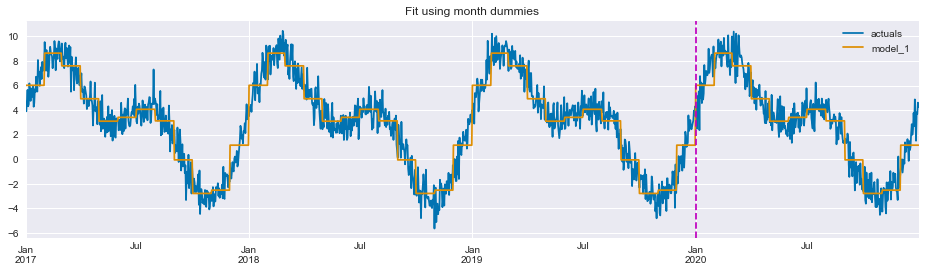

In [12]:
model_1 = LinearRegression().fit(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_1"] = model_1.predict(X_1)
results_df[["actuals", "model_1"]].plot(figsize=(16,4), 
                                        title="Fit using month dummies")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [13]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [14]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

In [21]:
X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

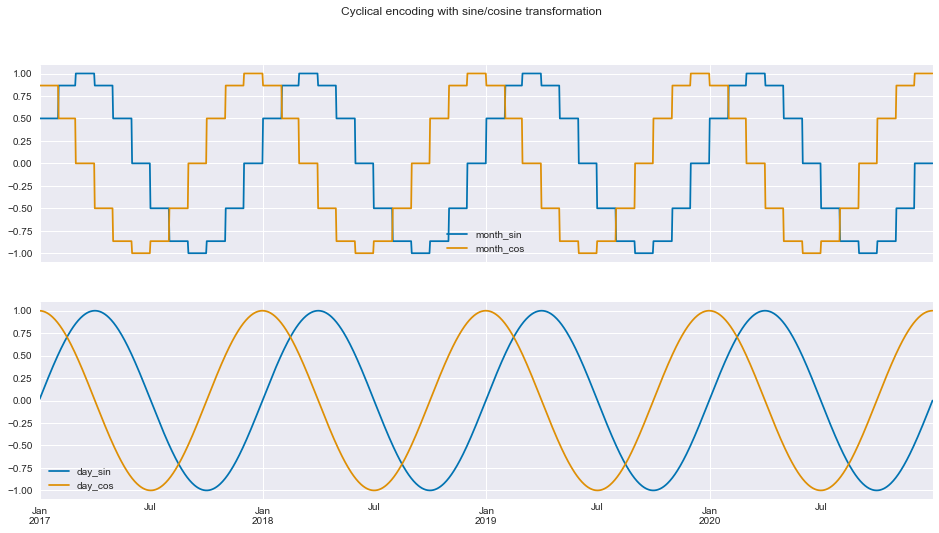

In [22]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


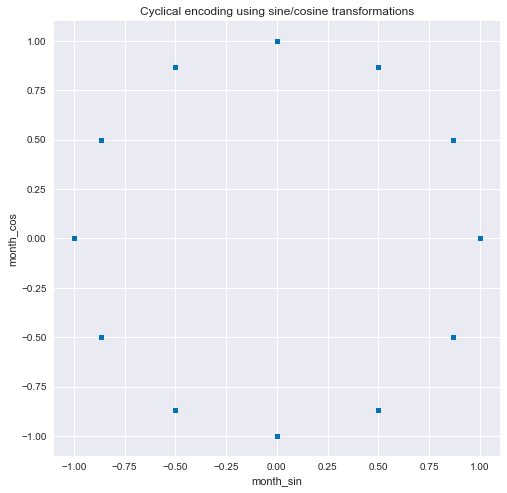

In [23]:
X_2[X_2.index.year == 2017].plot(kind="scatter", 
                                 x="month_sin", 
                                 y="month_cos", 
                                 figsize=(8, 8),
                                 title="Cyclical encoding using sine/cosine transformations");

In [24]:
X_2[X_2.index.year == 2017]

,day_nr,day_of_year,month,month_sin,month_cos,day_sin,day_cos
2017-01-01,0,1,1,5.000000e-01,0.866025,1.721336e-02,0.999852
2017-01-02,1,2,1,5.000000e-01,0.866025,3.442161e-02,0.999407
2017-01-03,2,3,1,5.000000e-01,0.866025,5.161967e-02,0.998667
2017-01-04,3,4,1,5.000000e-01,0.866025,6.880243e-02,0.997630
2017-01-05,4,5,1,5.000000e-01,0.866025,8.596480e-02,0.996298
...,...,...,...,...,...,...,...
2017-12-27,360,361,12,-2.449294e-16,1.000000,-6.880243e-02,0.997630
2017-12-28,361,362,12,-2.449294e-16,1.000000,-5.161967e-02,0.998667
2017-12-29,362,363,12,-2.449294e-16,1.000000,-3.442161e-02,0.999407
2017-12-30,363,364,12,-2.449294e-16,1.000000,-1.721336e-02,0.999852


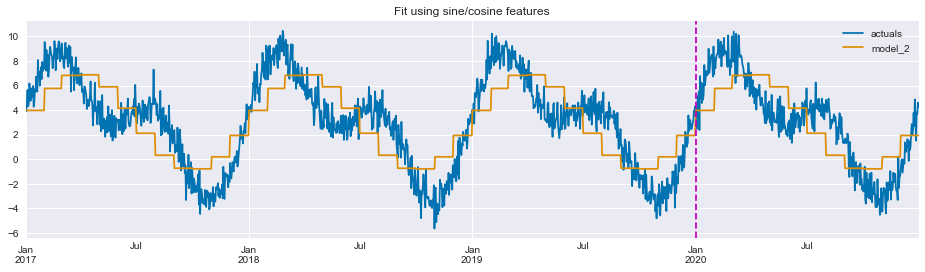

In [25]:
X_2_monthly = X_2[["month_sin", "month_cos"]]

model_2 = LinearRegression().fit(X_2_monthly.iloc[:TRAIN_END], 
                                 y.iloc[:TRAIN_END])

results_df["model_2"] = model_2.predict(X_2_monthly)
results_df[["actuals", "model_2"]].plot(figsize=(16,4), 
                                        title="Fit using sine/cosine features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

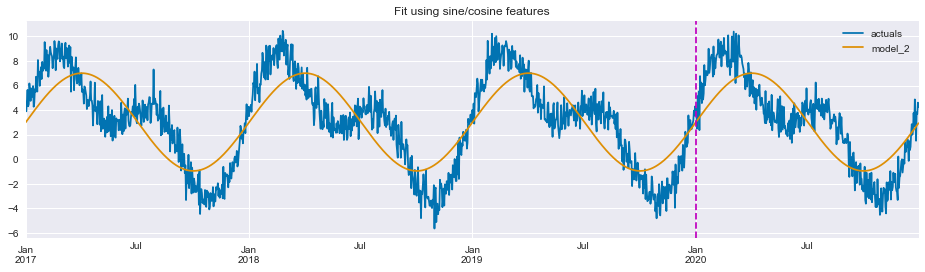

In [26]:
X_2_daily = X_2[["day_sin", "day_cos"]]

model_2 = LinearRegression().fit(X_2_daily.iloc[:TRAIN_END], 
                                 y.iloc[:TRAIN_END])

results_df["model_2"] = model_2.predict(X_2_daily)
results_df[["actuals", "model_2"]].plot(figsize=(16,4), 
                                        title="Fit using sine/cosine features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [28]:
rbf = RepeatingBasisFunction(n_periods=12,
                             column="day_of_year",
                             input_range=(1,365),
                             remainder="drop")
rbf.fit(X)
X_3 = pd.DataFrame(index=X.index, 
                   data=rbf.transform(X))

NameError: name 'RepeatingBasisFunction' is not defined

In [18]:
X_2

,day_nr,day_of_year,month
2017-01-01,0,1,1
2017-01-02,1,2,1
2017-01-03,2,3,1
2017-01-04,3,4,1
2017-01-05,4,5,1
...,...,...,...
2020-12-26,1455,361,12
2020-12-27,1456,362,12
2020-12-28,1457,363,12
2020-12-29,1458,364,12


In [20]:
 sin_transformer(12).fit_transform(X_2)["month"]

2017-01-01    5.000000e-01
2017-01-02    5.000000e-01
2017-01-03    5.000000e-01
2017-01-04    5.000000e-01
2017-01-05    5.000000e-01
                  ...     
2020-12-26   -2.449294e-16
2020-12-27   -2.449294e-16
2020-12-28   -2.449294e-16
2020-12-29   -2.449294e-16
2020-12-30   -2.449294e-16
Freq: D, Name: month, Length: 1460, dtype: float64